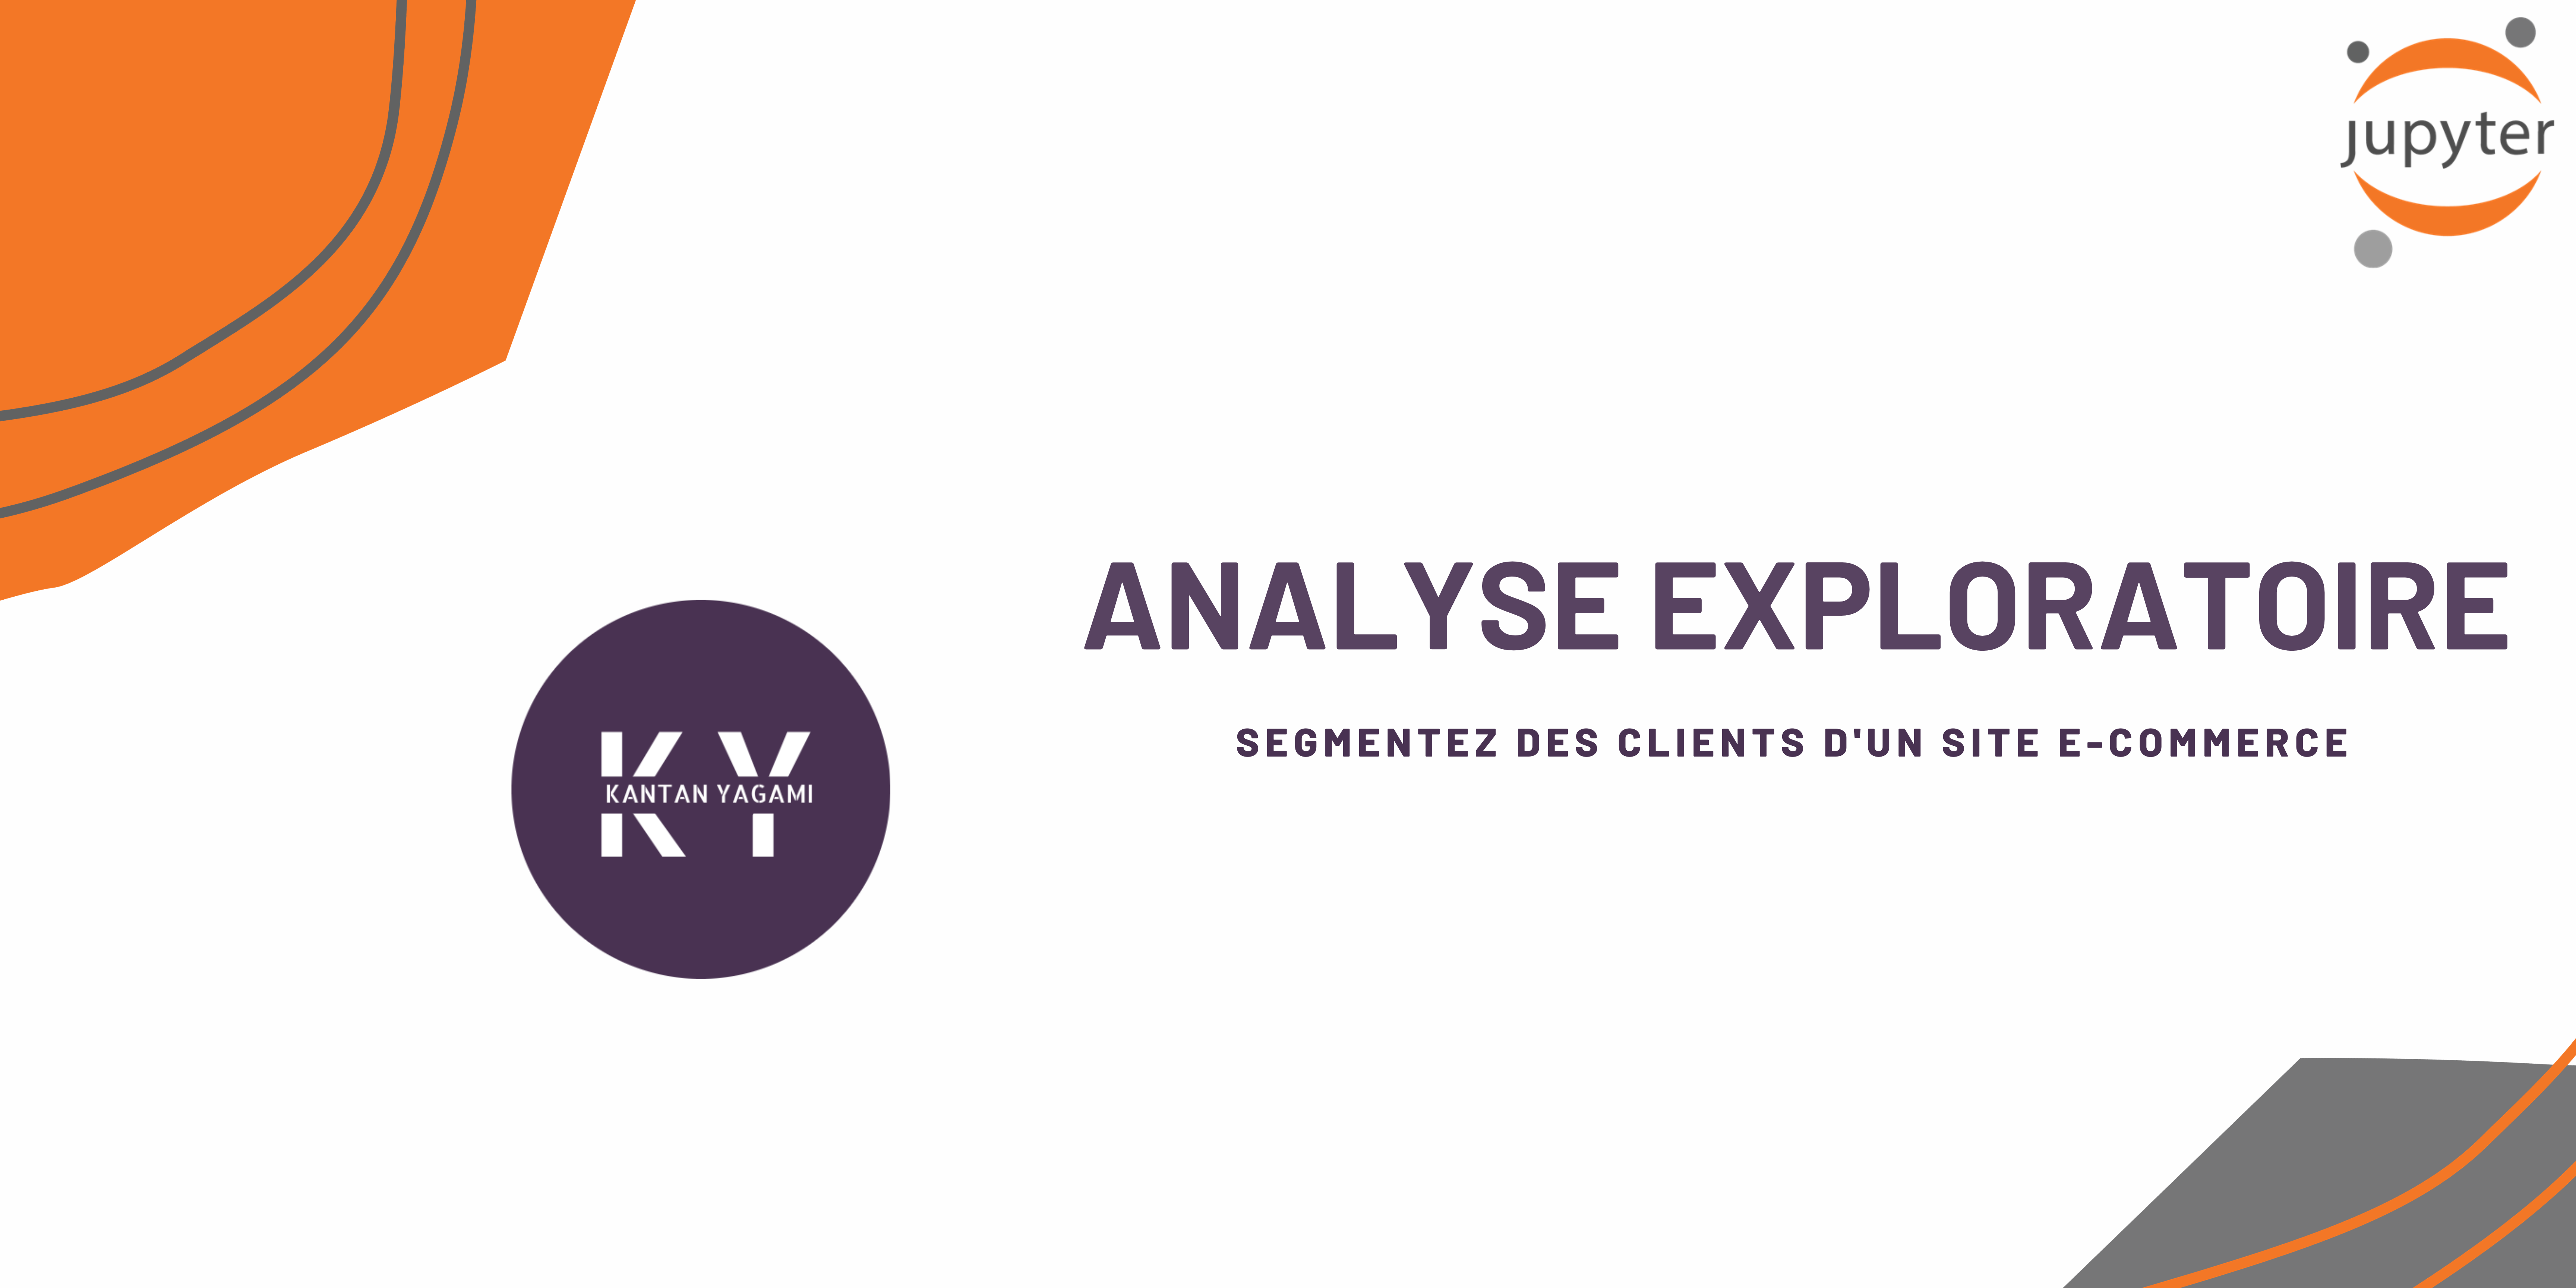

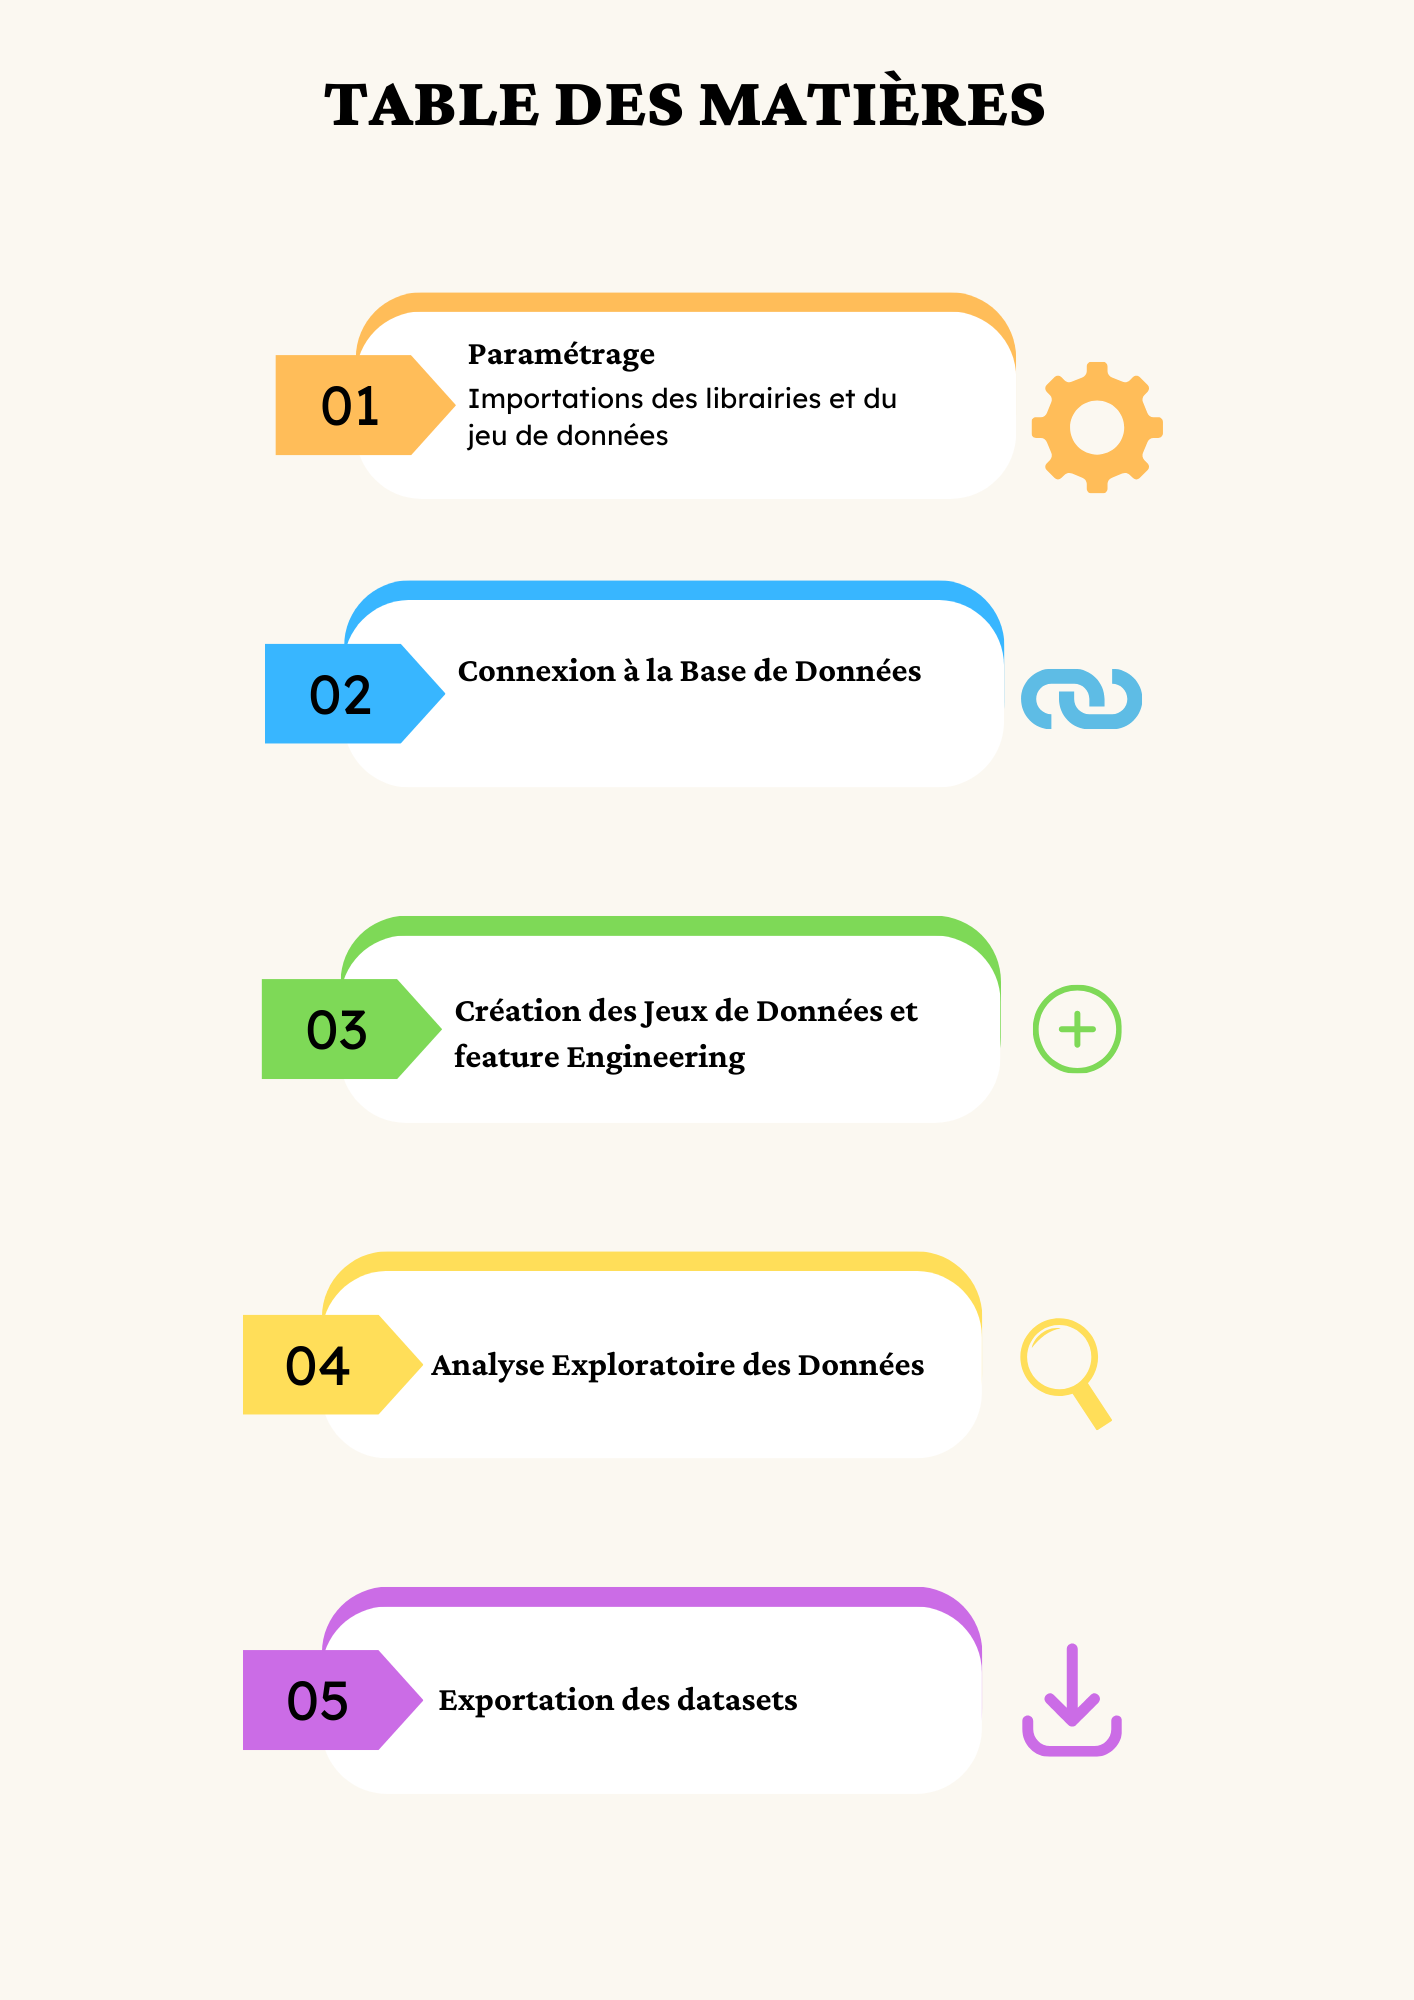

## Paramétrage

### Importations

In [1]:
import sqlite3

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

from datetime import datetime
import time

import missingno as msno

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

from scipy import stats
import scipy.stats as st

from scipy.stats import skew, kurtosis
from statsmodels.stats.diagnostic import lilliefors



## Connexion à la base de données

### Connexion à la base de données

In [2]:
# Chemin vers le fichier de base de données SQLite

db_path = 'Data/DB/olist.db'

# Connexion à la base de données
conn = sqlite3.connect(db_path)

### Schéma des tables de la base de données

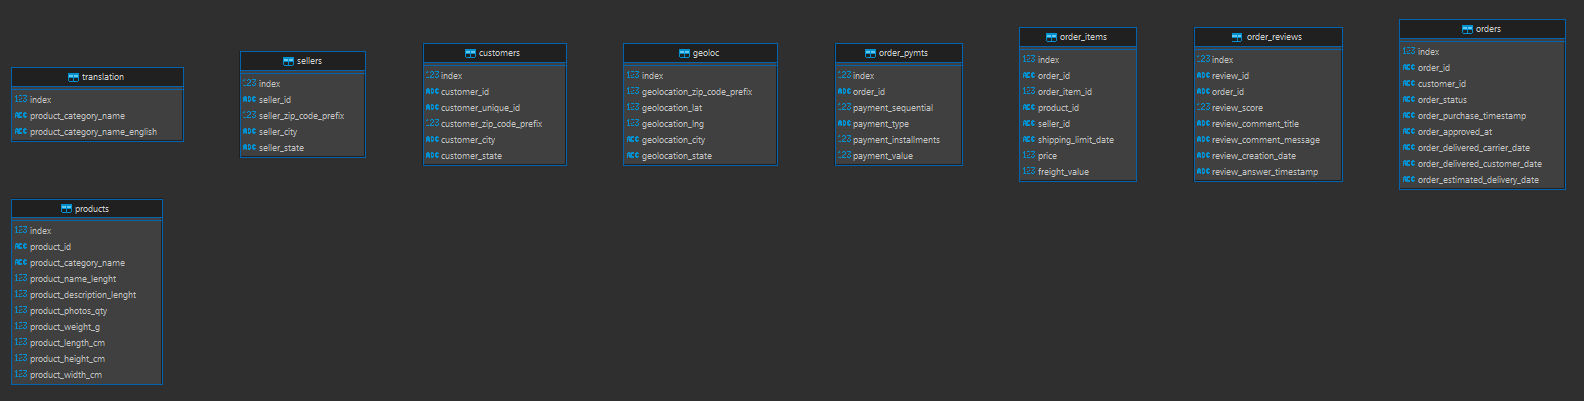

### Requêtes à la base de données

Recuperation des clients ayant passe plus d'une commande soit 3.014% de clients

In [3]:
# Création d'un objet Cursor pour interagir avec la base de données
cur = conn.cursor()

# Exécution d'une requête SQL pour extraire des informations sur les clients
"""
Cette requête sélectionne le nombre de commandes par client (Orders_number),

ainsi que les identifiants de commande (order_id), l'identifiant client dans la table des commandes (customer_id)
et l'identifiant unique du client (customer_unique_id).

La jointure est faite entre les tables 'orders' et 'customers' sur la base de l'identifiant client.

Les données sont regroupées par l'identifiant unique du client.

La clause 'HAVING' est utilisée pour ne considérer que les clients ayant réalisé plus d'une commande.

"""

cur.execute("""
select count(o.order_id) as 'Orders_number', o.order_id, c.customer_id, c.customer_unique_id
from orders o, customers c
where o.customer_id = c.customer_id
group by c.customer_unique_id
having count(o.order_id) > 1
"""
           )

# Récupération des résultats de la requête
# Les résultats sont stockés dans la variable 'resultats'.
resultats = cur.fetchall()


In [4]:
resultats

[(2,
  'bb874c45df1a3c97842d52f31efee99a',
  '1afe8a9c67eec3516c09a8bdcc539090',
  '00172711b30d52eea8b313a7f2cced02'),
 (2,
  '08204559bebd39e09ee52dcb56d8faa2',
  'f6efe5d5c7b85e12355f9d5c3db46da2',
  '004288347e5e88a27ded2bb23747066c'),
 (2,
  '9392c5e72885ad5aba87e6223ca9838d',
  'd95f60d70d9ea9a7fe37c53c931940bb',
  '004b45ec5c64187465168251cd1c9c2f'),
 (2,
  '81a93b2fa39e104b865b2bc471c16008',
  '8ac44e9c15d396b8c3c7cbab0fff4536',
  '0058f300f57d7b93c477a131a59b36c3'),
 (2,
  'cea3e6c11eb60acb9d8d4d51694832f8',
  'cbb68c721ba9ddb30d8a490cc1897fa1',
  '00a39521eb40f7012db50455bf083460'),
 (2,
  'd61b915b69851aec8a8865f36cfd793e',
  '102fc0966044243157bb81e4ee0a251e',
  '00cc12a6d8b578b8ebd21ea4e2ae8b27'),
 (2,
  '0f28d51fdd4828907bdc58b57f672e84',
  'bc4011fd2a5106761b5ba943c8fbd1b2',
  '011575986092c30523ecb71ff10cb473'),
 (2,
  'f05a68aaa0d8f89e758c7134d53fa22a',
  '7e16c78f08de9b2ec5b9eff657934019',
  '011b4adcd54683b480c4d841250a987f'),
 (2,
  'ce2b4f2836d78829e4796213d536101e

In [5]:
# Création d'un objet Cursor pour interagir avec la base de données
cur = conn.cursor()

# Exécution d'une requête SQL pour déterminer la date de la dernière commande de chaque client

"""
Cette requête sélectionne l'identifiant unique de chaque client (customer_unique_id)
et la date de sa dernière commande (last_purchase_date).

La jointure est réalisée entre les tables 'customers' et 'orders' en utilisant l'identifiant client.

La fonction MAX() est utilisée pour trouver la date de la commande la plus récente pour chaque client.

Les données sont regroupées par l'identifiant unique du client (customer_unique_id) 

afin de s'assurer que chaque client est représenté une seule fois dans le résultat.

"""

cur.execute("""
SELECT customer_unique_id, MAX(order_purchase_timestamp) AS last_purchase_date
FROM customers 
JOIN orders ON customers.customer_id = orders.customer_id
GROUP BY customer_unique_id;
"""
)

# Récupération des résultats de la requête
# Les résultats sont stockés dans la variable 'Recency'.
Recency = cur.fetchall()


In [6]:
Recency

[('0000366f3b9a7992bf8c76cfdf3221e2', '2018-05-10 10:56:27'),
 ('0000b849f77a49e4a4ce2b2a4ca5be3f', '2018-05-07 11:11:27'),
 ('0000f46a3911fa3c0805444483337064', '2017-03-10 21:05:03'),
 ('0000f6ccb0745a6a4b88665a16c9f078', '2017-10-12 20:29:41'),
 ('0004aac84e0df4da2b147fca70cf8255', '2017-11-14 19:45:42'),
 ('0004bd2a26a76fe21f786e4fbd80607f', '2018-04-05 19:33:16'),
 ('00050ab1314c0e55a6ca13cf7181fecf', '2018-04-20 12:57:23'),
 ('00053a61a98854899e70ed204dd4bafe', '2018-02-28 11:15:41'),
 ('0005e1862207bf6ccc02e4228effd9a0', '2017-03-04 23:32:12'),
 ('0005ef4cd20d2893f0d9fbd94d3c0d97', '2018-03-12 15:22:12'),
 ('0006fdc98a402fceb4eb0ee528f6a8d4', '2017-07-18 09:23:10'),
 ('00082cbe03e478190aadbea78542e933', '2017-11-19 15:22:02'),
 ('00090324bbad0e9342388303bb71ba0a', '2018-03-24 14:44:41'),
 ('000949456b182f53c18b68d6babc79c1', '2018-04-23 09:55:46'),
 ('000a5ad9c4601d2bbdd9ed765d5213b3', '2017-08-11 13:45:15'),
 ('000bfa1d2f1a41876493be685390d6d3', '2017-09-29 14:46:58'),
 ('000c8

In [7]:
# Création d'un objet Cursor pour interagir avec la base de données.
cur = conn.cursor()

# Exécution d'une requête SQL pour calculer la fréquence totale des commandes par client.

"""
Cette requête sélectionne l'identifiant unique de chaque client (customer_unique_id)
et compte le nombre total de commandes (total_orders) qu'ils ont passées.

La jointure entre les tables 'customers' et 'orders' est effectuée sur l'identifiant client,
garantissant que toutes les commandes de chaque client sont comptabilisées.

Les données sont ensuite regroupées par l'identifiant unique du client pour obtenir un total de commandes
pour chaque client individuellement.
"""

cur.execute("""
SELECT customer_unique_id, COUNT(order_id) AS total_orders
FROM customers 
JOIN orders ON customers.customer_id = orders.customer_id
GROUP BY customer_unique_id;
"""
)

# Récupération des résultats de la requête.
# Les résultats sont stockés dans la variable 'frequency'.
frequency = cur.fetchall()


In [8]:
frequency

[('0000366f3b9a7992bf8c76cfdf3221e2', 1),
 ('0000b849f77a49e4a4ce2b2a4ca5be3f', 1),
 ('0000f46a3911fa3c0805444483337064', 1),
 ('0000f6ccb0745a6a4b88665a16c9f078', 1),
 ('0004aac84e0df4da2b147fca70cf8255', 1),
 ('0004bd2a26a76fe21f786e4fbd80607f', 1),
 ('00050ab1314c0e55a6ca13cf7181fecf', 1),
 ('00053a61a98854899e70ed204dd4bafe', 1),
 ('0005e1862207bf6ccc02e4228effd9a0', 1),
 ('0005ef4cd20d2893f0d9fbd94d3c0d97', 1),
 ('0006fdc98a402fceb4eb0ee528f6a8d4', 1),
 ('00082cbe03e478190aadbea78542e933', 1),
 ('00090324bbad0e9342388303bb71ba0a', 1),
 ('000949456b182f53c18b68d6babc79c1', 1),
 ('000a5ad9c4601d2bbdd9ed765d5213b3', 1),
 ('000bfa1d2f1a41876493be685390d6d3', 1),
 ('000c8bdb58a29e7115cfc257230fb21b', 1),
 ('000d460961d6dbfa3ec6c9f5805769e1', 1),
 ('000de6019bb59f34c099a907c151d855', 1),
 ('000e309254ab1fc5ba99dd469d36bdb4', 1),
 ('000ec5bff359e1c0ad76a81a45cb598f', 1),
 ('000ed48ceeb6f4bf8ad021a10a3c7b43', 1),
 ('000fbf0473c10fc1ab6f8d2d286ce20c', 1),
 ('0010a452c6d13139e50b57f19f52e04

In [9]:
# Création d'un objet Cursor pour interagir avec la base de données.
cur = conn.cursor()

# Exécution d'une requête SQL pour calculer le montant total dépensé par chaque client.

"""
Cette requête sélectionne l'identifiant unique du client (customer_unique_id)
et la somme totale des valeurs de paiement (total_spent) pour toutes ses commandes.

Une jointure est effectuée entre les tables 'customers', 'orders' et 'order_pymts'.

La jointure avec 'orders' est basée sur l'identifiant client,
tandis que la jointure avec 'order_pymts' est basée sur l'identifiant de la commande.

Le but est de lier chaque paiement à son client respectif.

Les données sont regroupées par l'identifiant unique du client
pour obtenir le montant total dépensé par chaque client.
"""

cur.execute("""
SELECT customer_unique_id, SUM(payment_value) AS total_spent
FROM customers 
JOIN orders ON customers.customer_id = orders.customer_id
JOIN order_pymts ON orders.order_id = order_pymts.order_id
GROUP BY customer_unique_id;
"""
)

# Récupération des résultats de la requête.
# Les résultats, stockés dans la variable 'Rising', contiennent le montant total dépensé par chaque client.
Rising = cur.fetchall()


In [10]:
Rising

[('0000366f3b9a7992bf8c76cfdf3221e2', 141.9),
 ('0000b849f77a49e4a4ce2b2a4ca5be3f', 27.19),
 ('0000f46a3911fa3c0805444483337064', 86.22),
 ('0000f6ccb0745a6a4b88665a16c9f078', 43.62),
 ('0004aac84e0df4da2b147fca70cf8255', 196.89),
 ('0004bd2a26a76fe21f786e4fbd80607f', 166.98),
 ('00050ab1314c0e55a6ca13cf7181fecf', 35.38),
 ('00053a61a98854899e70ed204dd4bafe', 419.18),
 ('0005e1862207bf6ccc02e4228effd9a0', 150.12),
 ('0005ef4cd20d2893f0d9fbd94d3c0d97', 129.76),
 ('0006fdc98a402fceb4eb0ee528f6a8d4', 29.0),
 ('00082cbe03e478190aadbea78542e933', 126.26),
 ('00090324bbad0e9342388303bb71ba0a', 63.66),
 ('000949456b182f53c18b68d6babc79c1', 82.05),
 ('000a5ad9c4601d2bbdd9ed765d5213b3', 91.28),
 ('000bfa1d2f1a41876493be685390d6d3', 46.85),
 ('000c8bdb58a29e7115cfc257230fb21b', 29.0),
 ('000d460961d6dbfa3ec6c9f5805769e1', 36.68),
 ('000de6019bb59f34c099a907c151d855', 257.44),
 ('000e309254ab1fc5ba99dd469d36bdb4', 78.42),
 ('000ec5bff359e1c0ad76a81a45cb598f', 27.75),
 ('000ed48ceeb6f4bf8ad021a10a

In [11]:
# Création d'un objet Cursor pour interagir avec la base de données.
cur = conn.cursor()

# Exécution d'une requête SQL pour calculer la note moyenne des avis par client.

"""
Cette requête sélectionne l'identifiant unique de chaque client (customer_unique_id)
et calcule la moyenne des scores d'avis (average_review_score) pour toutes ses commandes.

Une jointure est effectuée entre les tables 'customers', 'orders' et 'order_reviews'.

La jointure avec 'orders' est basée sur l'identifiant client,
et celle avec 'order_reviews' est basée sur l'identifiant de la commande.

L'objectif est de relier chaque avis à son client respectif.

Les données sont regroupées par l'identifiant unique du client
pour obtenir la note moyenne des avis pour chaque client.

"""

cur.execute("""
SELECT c.customer_unique_id, 
       AVG(r.review_score) AS average_review_score
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_reviews r ON o.order_id = r.order_id
GROUP BY c.customer_unique_id;
"""
)

# Récupération des résultats de la requête.
# Les résultats, stockés dans la variable 'review_average', contiennent la note moyenne des avis pour chaque client.
review_average = cur.fetchall()

In [12]:
review_average

[('0000366f3b9a7992bf8c76cfdf3221e2', 5.0),
 ('0000b849f77a49e4a4ce2b2a4ca5be3f', 4.0),
 ('0000f46a3911fa3c0805444483337064', 3.0),
 ('0000f6ccb0745a6a4b88665a16c9f078', 4.0),
 ('0004aac84e0df4da2b147fca70cf8255', 5.0),
 ('0004bd2a26a76fe21f786e4fbd80607f', 4.0),
 ('00050ab1314c0e55a6ca13cf7181fecf', 4.0),
 ('00053a61a98854899e70ed204dd4bafe', 1.0),
 ('0005e1862207bf6ccc02e4228effd9a0', 4.0),
 ('0005ef4cd20d2893f0d9fbd94d3c0d97', 1.0),
 ('0006fdc98a402fceb4eb0ee528f6a8d4', 3.0),
 ('00082cbe03e478190aadbea78542e933', 5.0),
 ('00090324bbad0e9342388303bb71ba0a', 5.0),
 ('000949456b182f53c18b68d6babc79c1', 4.0),
 ('000a5ad9c4601d2bbdd9ed765d5213b3', 4.0),
 ('000bfa1d2f1a41876493be685390d6d3', 4.5),
 ('000c8bdb58a29e7115cfc257230fb21b', 5.0),
 ('000d460961d6dbfa3ec6c9f5805769e1', 5.0),
 ('000de6019bb59f34c099a907c151d855', 2.0),
 ('000e309254ab1fc5ba99dd469d36bdb4', 3.0),
 ('000ec5bff359e1c0ad76a81a45cb598f', 5.0),
 ('000ed48ceeb6f4bf8ad021a10a3c7b43', 5.0),
 ('000fbf0473c10fc1ab6f8d2d286ce

## Création des Jeux de Données et feature Engineering

In [13]:
# Conversion des résultats en DataFrames Pandas
df_importance = pd.DataFrame(resultats, columns=['Orders_number', 'order_id', 'customer_id', 'customer_unique_id'])
df_recency = pd.DataFrame(Recency, columns=['customer_unique_id', 'last_purchase_date'])
df_frequency = pd.DataFrame(frequency, columns=['customer_unique_id', 'total_orders'])

# Remplacer 'Rising' par la requête et les résultats corrects pour le montant total dépensé
df_rising = pd.DataFrame(Rising, columns=['customer_unique_id', 'total_spent'])
df_review_average = pd.DataFrame(review_average, columns=['customer_unique_id', 'average_review_score'])

# Création d'une colonne 'Importance' basée sur la présence dans df_importance
df_importance['Importance'] = True
df_importance = df_importance[['customer_unique_id', 'Importance']]

# Fusion des DataFrames
df_data = df_recency.merge(df_frequency, on='customer_unique_id', how='outer')
df_data = df_data.merge(df_rising, on='customer_unique_id', how='outer')
df_data = df_data.merge(df_review_average, on='customer_unique_id', how='outer')
df_data = df_data.merge(df_importance, on='customer_unique_id', how='outer')

# Remplir les valeurs manquantes dans 'Importance' par False
df_data['Importance'] = df_data['Importance'].fillna(False)

# Réorganisation des colonnes
df_data = df_data[['customer_unique_id', 'Importance', 'last_purchase_date', 'total_orders', 'total_spent', 'average_review_score']]

# Renommer les colonnes pour correspondre à vos spécifications
df_data.columns = ['customer_unique_id', 'Importance', 'Recency', 'Frequency', 'Rising', 'Review_average']

In [14]:
df_data['Frequency'].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 17])

## Analyse Exploratoire des Données 

<h4>Affichage des cinq premières lignes de notre DataFrame : </h4>

In [15]:
df_data.head()

,customer_unique_id,Importance,Recency,Frequency,Rising,Review_average
0,0000366f3b9a7992bf8c76cfdf3221e2,False,2018-05-10 10:56:27,1,141.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,False,2018-05-07 11:11:27,1,27.19,4.0
2,0000f46a3911fa3c0805444483337064,False,2017-03-10 21:05:03,1,86.22,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,False,2017-10-12 20:29:41,1,43.62,4.0
4,0004aac84e0df4da2b147fca70cf8255,False,2017-11-14 19:45:42,1,196.89,5.0


<h4>Affichage les informations de notre DataFrame : </h4>

In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96096 entries, 0 to 96095
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  96096 non-null  object 
 1   Importance          96096 non-null  bool   
 2   Recency             96096 non-null  object 
 3   Frequency           96096 non-null  int64  
 4   Rising              96095 non-null  float64
 5   Review_average      95380 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 4.5+ MB


<h4>Affichage du nombre de lignes et de colonnes dans le Data Frame :</h4>

In [17]:
print("Nombre de colonnes :", df_data.shape[1])
print("Nombre de lignes :", df_data.shape[0])

Nombre de colonnes : 6
Nombre de lignes : 96096


<h4>Affichage des types de données de chaque colonne : </h4>

In [18]:
print("Types de données :")
df_data.dtypes

Types de données :


customer_unique_id     object
Importance               bool
Recency                object
Frequency               int64
Rising                float64
Review_average        float64
dtype: object

<h4>Affichage des statistiques descriptives pour chaque colonne numérique (moyenne, médiane, min, max, écart-type, etc.) : </h4>

In [19]:
df_data.describe()

,Frequency,Rising,Review_average
count,96096.000000,96095.000000,95380.000000
mean,1.034809,166.594226,4.084989
std,0.214384,231.428912,1.341571
min,1.000000,0.000000,1.000000
25%,1.000000,63.120000,4.000000
50%,1.000000,108.000000,5.000000
75%,1.000000,183.530000,5.000000
max,17.000000,13664.080000,5.000000


<h4>Affichage du pourcentage de valeurs manquantes par colonne : </h4>

In [20]:
df_data.isnull().mean()

customer_unique_id    0.000000
Importance            0.000000
Recency               0.000000
Frequency             0.000000
Rising                0.000010
Review_average        0.007451
dtype: float64

<h4>Affichage du nombre de valeurs manquantes :</h4>

In [21]:
df_data.isnull().sum()

customer_unique_id      0
Importance              0
Recency                 0
Frequency               0
Rising                  1
Review_average        716
dtype: int64

<h4>Comparaison du nombre total de valeurs avec le nombre de valeurs manquantes : </h4>

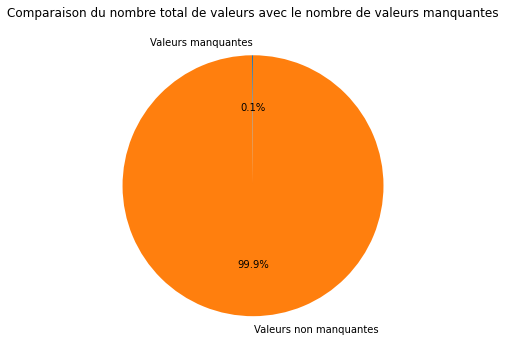

In [22]:
# Calculer le nombre total de valeurs
total_values = df_data.size

# Calculer le nombre total de valeurs manquantes
total_missing = df_data.isnull().sum().sum()

# Créer les labels pour le diagramme
labels = ['Valeurs manquantes', 'Valeurs non manquantes']

# Créer les valeurs pour le diagramme
values = [total_missing, total_values - total_missing]

# Créer le diagramme camembert
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Ajouter un titre au diagramme
plt.title("Comparaison du nombre total de valeurs avec le nombre de valeurs manquantes")

# Afficher le diagramme
plt.show()

## Nettoyage du jeu de données

### Visualiser des valeurs manquantes

#### Matrice

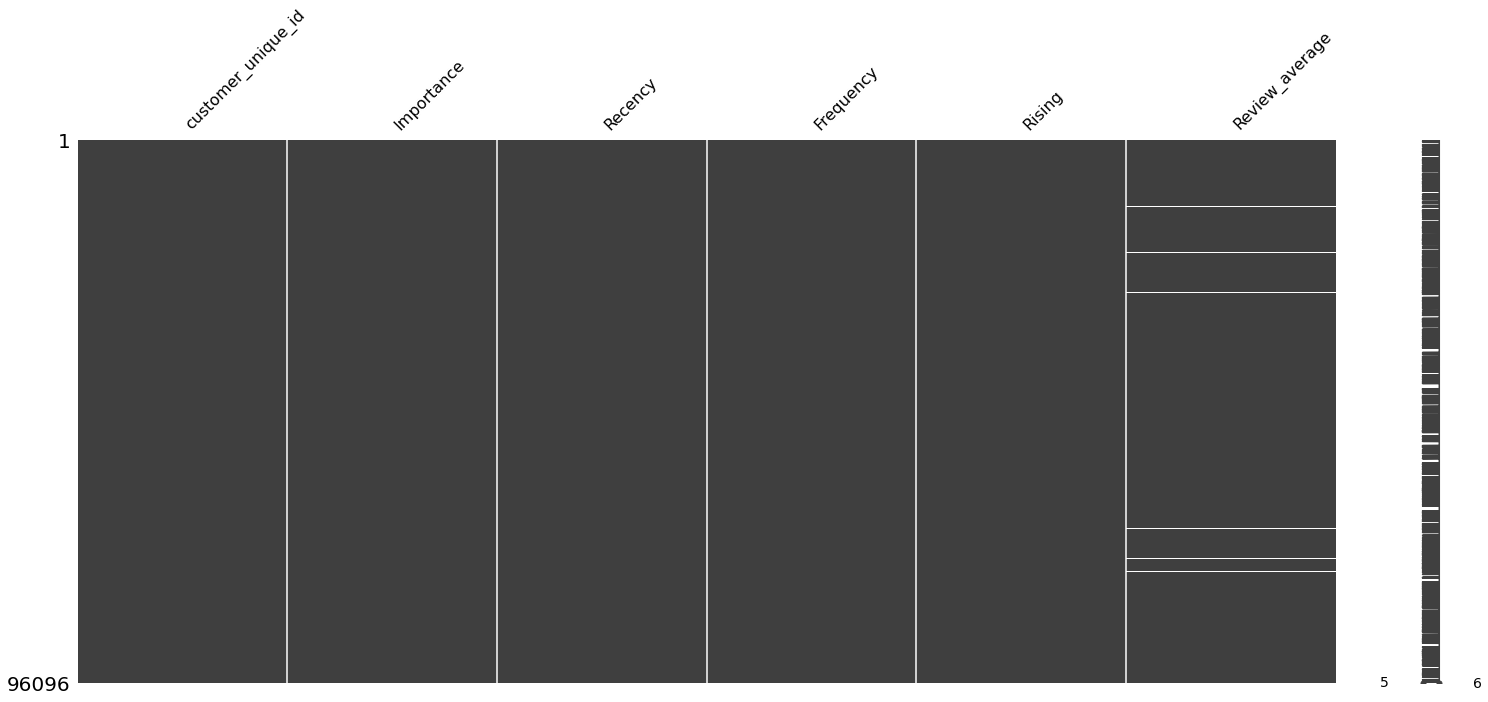

In [23]:
msno.matrix(df_data)
plt.show()

#### Diagramme en barres

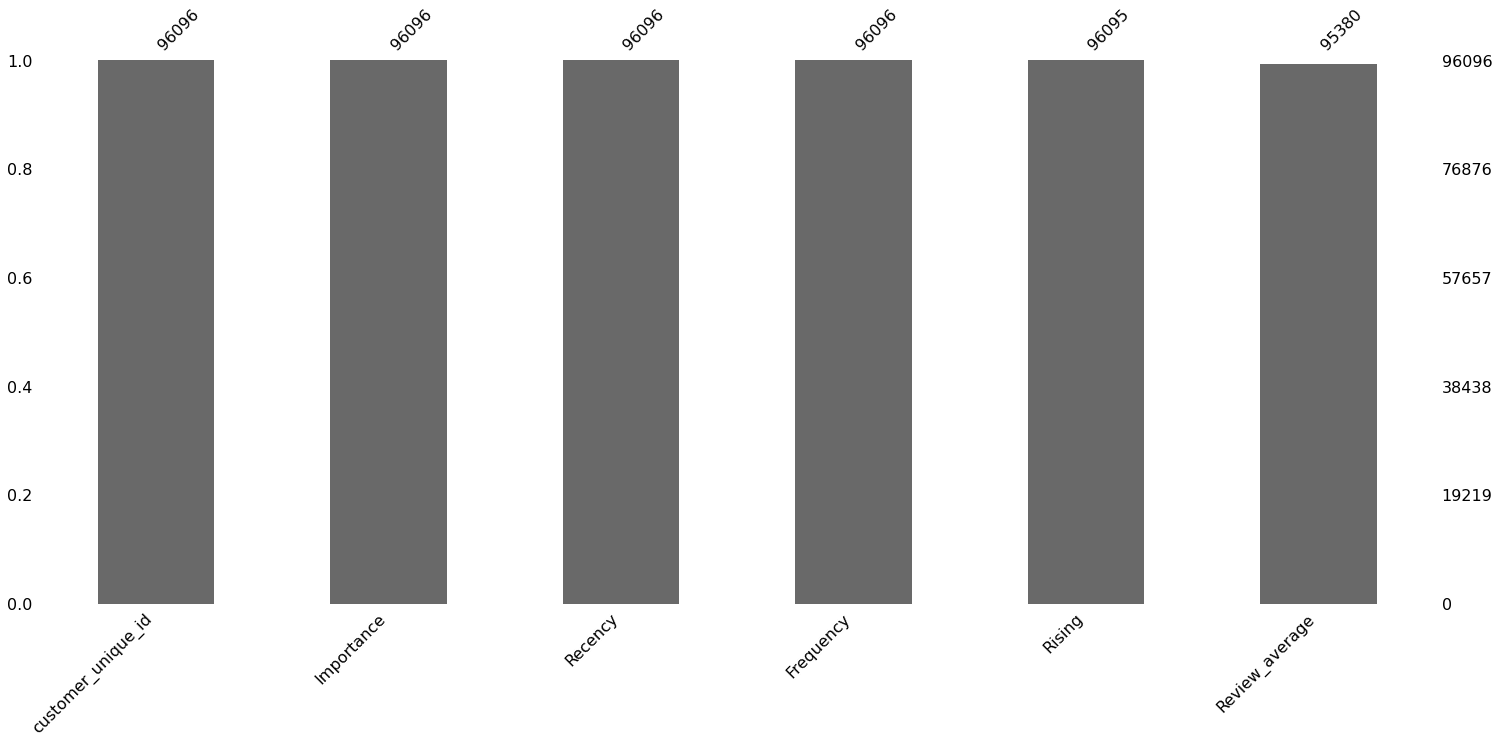

In [24]:
msno.bar(df_data)
plt.show()

#### Recherche de corrélas pour les valeurs manquantes

##### Heatmap ( carte de chaleur)

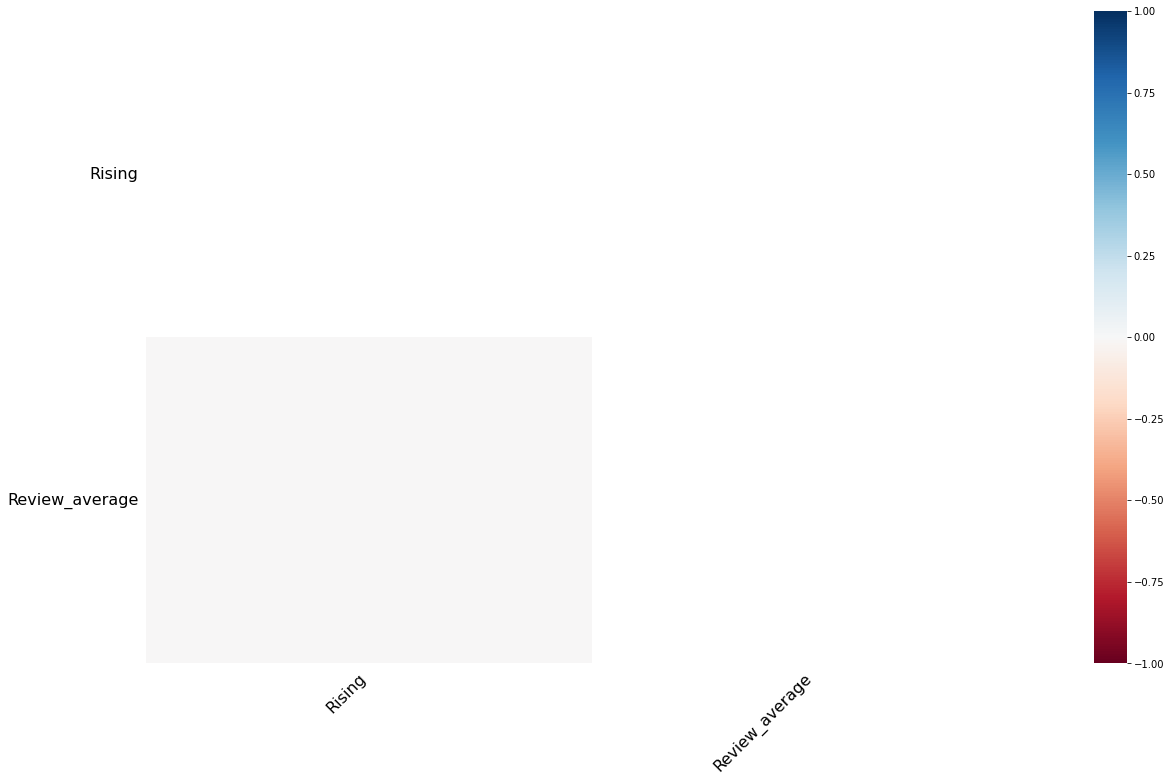

In [25]:
msno.heatmap(df_data)
plt.show()

#####  Dendrogram

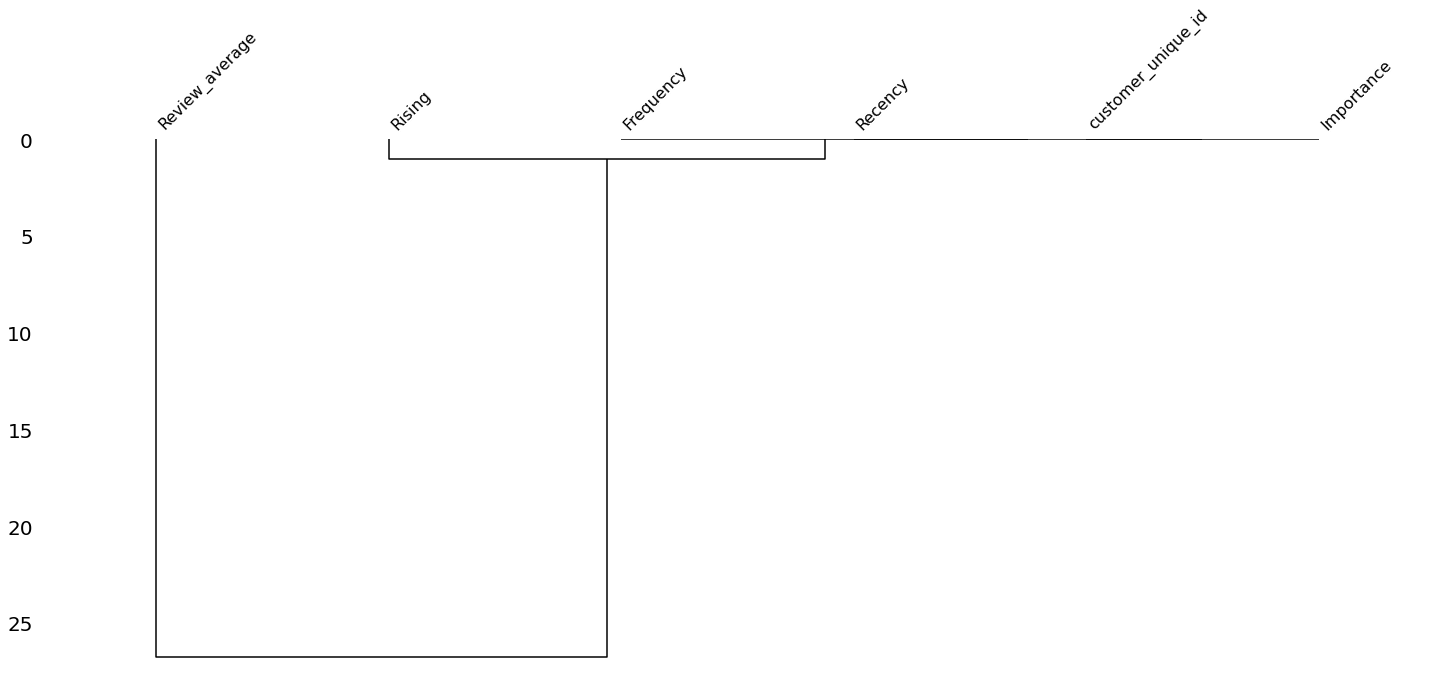

In [26]:
# Analyser la corrélation entre les valeurs manquantes
msno.dendrogram(df_data)
plt.show()

L'examen attentif de notre dendrogramme suggère que les données manquantes dans notre ensemble sont de type MNAR (Missing Not At Random).

Cette conclusion est étayée par l'observation d'une corrélation entre la variable 'Rising', présentant une valeur manquante, et la variable 'Review_average'.

#####  Tableau des valeurs manquantes par colonne

In [27]:
missing_values = df_data.isnull().sum()
missing_percent = (missing_values / len(df_data)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_table

,Missing Values,Percentage
customer_unique_id,0,0.000000
Importance,0,0.000000
Recency,0,0.000000
Frequency,0,0.000000
Rising,1,0.001041
Review_average,716,0.745088


### Gérer les valeurs manquantes 

#### Rising

Nous avons identifié une unique valeur manquante dans la variable 'Rising'. 

Considérant que cette absence représente une proportion négligeable de l'ensemble des données (< 0.001%), nous avons opté pour une approche conservative consistant à éliminer cette observation spécifique.

Cette décision vise à préserver l'intégrité et la qualité des données utilisées pour le clustering.

In [28]:
# Supprimer uniquement les lignes où 'Rising' a des valeurs manquantes
df_data_clean = df_data.dropna(subset=['Rising'])

# Vérifier à nouveau les valeurs manquantes dans le DataFrame nettoyé
missing_values_clean = df_data_clean.isnull().sum()
print("Valeurs manquantes après nettoyage :\n", missing_values_clean)

Valeurs manquantes après nettoyage :
 customer_unique_id      0
Importance              0
Recency                 0
Frequency               0
Rising                  0
Review_average        716
dtype: int64


#### Review_average

L'analyse de la variable `Review_average` révèle l'existence de 716 données manquantes, ce qui représente 0,74 % de l'ensemble des données.

Étant donné que ces absences sont classifiées comme MNAR (Missing Not At Random), plusieurs stratégies d'imputation sont envisageables pour pallier ce manque :

- Imputation par la méthode des K-plus proches voisins (KNN).
- Imputation basée sur l'algorithme MissForest.
- Imputation par régression.

Avant de décider de la méthode d'imputation, nous allons mené une série de tests de normalité pour évaluer la distribution de la variable `Review_average`.

In [29]:
# Niveau de signification (alpha)
alpha = 0.05

# Liste pour stocker les résultats
results = []

# Variable quantitative à tester
quantitative_column = 'Review_average'

# Récupérer les valeurs de la variable
values = df_data[quantitative_column].dropna()

# Effectuer les tests de normalité
shapiro_test = stats.shapiro(values)
ks_test = stats.kstest(values, 'norm')
ad_test = stats.anderson(values, dist='norm')
dagostino_test = stats.normaltest(values)
lilliefors_test = lilliefors(values, dist='norm')

# Ajouter les résultats à la liste
results.extend([
    {
        'Variable': quantitative_column,
        'Nom du test': 'Shapiro-Wilk',
        'Statistique de test': shapiro_test[0],
        'p-valeur': shapiro_test[1],
        'Normalité': 'Oui' if shapiro_test[1] > alpha else 'Non'
    },
    {
        'Variable': quantitative_column,
        'Nom du test': 'Kolmogorov-Smirnov',
        'Statistique de test': ks_test.statistic,
        'p-valeur': ks_test.pvalue,
        'Normalité': 'Oui' if ks_test.pvalue > alpha else 'Non'
    },
    {
        'Variable': quantitative_column,
        'Nom du test': 'Anderson-Darling',
        'Statistique de test': ad_test.statistic,
        'p-valeur': None,  # La p-valeur n'est pas directement fournie par le test d'Anderson-Darling
        'Normalité': 'Oui' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'Non'
    },
    {
        'Variable': quantitative_column,
        'Nom du test': "D'Agostino-Pearson",
        'Statistique de test': dagostino_test.statistic,
        'p-valeur': dagostino_test.pvalue,
        'Normalité': 'Oui' if dagostino_test.pvalue > alpha else 'Non'
    },
    {
        'Variable': quantitative_column,
        'Nom du test': 'Lilliefors',
        'Statistique de test': lilliefors_test[0],
        'p-valeur': lilliefors_test[1],
        'Normalité': 'Oui' if lilliefors_test[1] > alpha else 'Non'
    }
])

# Création d'un DataFrame avec les résultats
test_results = pd.DataFrame(results)

test_results


/home/nexus/venv/lib/python3.6/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Variable,Nom du test,Statistique de test,p-valeur,Normalité
0,Review_average,Shapiro-Wilk,0.691650,0.000,Non
1,Review_average,Kolmogorov-Smirnov,0.863798,0.000,Non
2,Review_average,Anderson-Darling,12118.263484,NaN,Non
3,Review_average,D'Agostino-Pearson,18164.113444,0.000,Non
4,Review_average,Lilliefors,0.324883,0.001,Non


Les tests suivants ont systématiquement rejeté l'hypothèse de normalité, indiquant une distribution non normale de `Review_average`.

Compte tenu des résultats des tests de normalité, nous avons éliminé l'option de l'imputation par régression, généralement plus adaptée aux données manquantes de type MCAR (Missing Completely At Random) et supposant une distribution normale des variables.

Notre première approche consistera à utiliser la méthode KNN pour l'imputation.

Cette méthode est alignée avec notre objectif de clustering non supervisé, car elle repose sur le principe de proximité, similaire aux méthodes de clustering.

Si cette approche ne se révèle pas concluante, nous envisagerons l'utilisation de l'algorithme MissForest, plus complexe, mais potentiellement plus efficace pour gérer des distributions de données complexes et asymétriques.

#### Normalisation

Nos résultats indiquent clairement que la distribution de `Review_average` n'est pas normale.

Dans ce contexte, nous allons normaliser nos donnes avant de procéder à notre modélisation.

In [30]:
# Création d'un DataFrame spécifique pour l'imputation KNN
df_for_knn = df_data_clean.copy()

# Sélection de la colonne à normaliser
column_to_normalize = 'Review_average'

# Identification des indices des valeurs non manquantes
non_missing_indices = df_for_knn[column_to_normalize].notna()

# Création de l'objet MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalisation de la colonne 'Review_average' en excluant les valeurs NaN
normalized_data = min_max_scaler.fit_transform(df_for_knn.loc[non_missing_indices, [column_to_normalize]])

# Réintégration des valeurs normalisées dans le DataFrame original
df_for_knn.loc[non_missing_indices, column_to_normalize] = normalized_data.flatten()

# Affichage des premières lignes pour vérifier la normalisation
df_for_knn.head()


,customer_unique_id,Importance,Recency,Frequency,Rising,Review_average
0,0000366f3b9a7992bf8c76cfdf3221e2,False,2018-05-10 10:56:27,1,141.90,1.00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,False,2018-05-07 11:11:27,1,27.19,0.75
2,0000f46a3911fa3c0805444483337064,False,2017-03-10 21:05:03,1,86.22,0.50
3,0000f6ccb0745a6a4b88665a16c9f078,False,2017-10-12 20:29:41,1,43.62,0.75
4,0004aac84e0df4da2b147fca70cf8255,False,2017-11-14 19:45:42,1,196.89,1.00


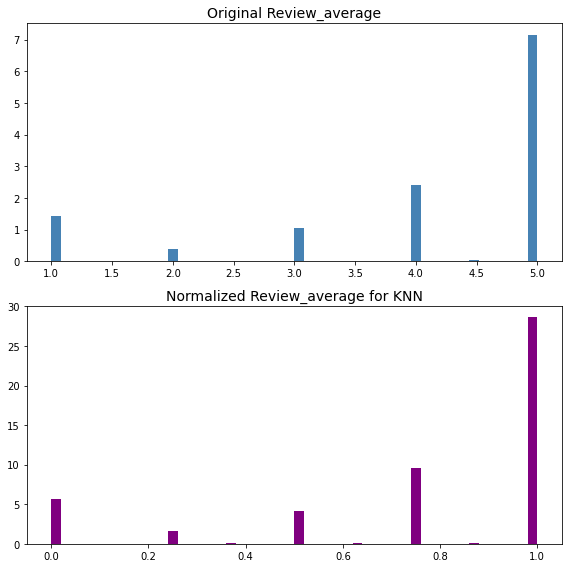

In [31]:
fig, axes = plt.subplots(nrows=2, figsize=(8, 8))

# Affichage de la donnée originale 'Review_average'
axes[0].hist(df_data_clean['Review_average'].dropna(), bins=50, color='steelblue', density=True, edgecolor='none')
axes[0].set_title('Original Review_average', fontsize=14)

# Affichage de la donnée normalisée 'Review_average' dans df_for_knn
axes[1].hist(df_for_knn['Review_average'], bins=50, color='purple', density=True, edgecolor='none')
axes[1].set_title('Normalized Review_average for KNN', fontsize=14)

# Ajustement des subplots pour la lisibilité
plt.tight_layout()
plt.show()


#### Remplace les valeurs manquantes via KNN

In [32]:
# Sélection de la colonne 'Review_average' pour l'imputation KNN
df_for_knn_numeric = df_for_knn[['Review_average']]

# Sélectionner un sous-ensemble de données sans valeurs manquantes
subset = df_for_knn_numeric[df_for_knn_numeric['Review_average'].notna()]

# Tester différents nombres de voisins
n_neighbors_options = [3, 5, 7, 9, 11]
results = []

for n_neighbors in n_neighbors_options:
    start_time = time.time()
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_values = imputer.fit_transform(subset)
    end_time = time.time()
    mse = mean_squared_error(subset['Review_average'], imputed_values[:, 0])
    results.append({'n_neighbors': n_neighbors, 'MSE': mse, 'Time (s)': end_time - start_time})

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

# Afficher les résultats
print(results_df)

# Choisir le nombre de voisins avec l'erreur la plus faible
best_n_neighbors = n_neighbors_options[np.argmin(results_df['MSE'])]
print(f"Meilleur nombre de voisins : {best_n_neighbors}")


   n_neighbors  MSE  Time (s)
0            3  0.0  0.004664
1            5  0.0  0.003802
2            7  0.0  0.003079
3            9  0.0  0.002808
4           11  0.0  0.002773
Meilleur nombre de voisins : 3


In [33]:
# Créer l'objet KNNImputer avec 3 voisins
imputer = KNNImputer(n_neighbors=3)

# Mesurer le temps de début
start_time = time.time()

# Appliquer l'imputation sur la colonne 'Review_average' de df_for_knn
df_for_knn['Review_average'] = imputer.fit_transform(df_for_knn[['Review_average']])

# Mesurer le temps de fin
end_time = time.time()

# Calculer le temps total
time_taken = end_time - start_time
print(f"Temps d'exécution de l'imputation : {time_taken} secondes")

# Réintégrer les valeurs imputées dans le DataFrame original
df_data_clean['Review_average'] = df_for_knn['Review_average']

# Afficher les premières lignes pour vérifier l'imputation
df_data_clean.head()

Temps d'exécution de l'imputation : 5.581063270568848 secondes


/home/nexus/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customer_unique_id,Importance,Recency,Frequency,Rising,Review_average
0,0000366f3b9a7992bf8c76cfdf3221e2,False,2018-05-10 10:56:27,1,141.90,1.00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,False,2018-05-07 11:11:27,1,27.19,0.75
2,0000f46a3911fa3c0805444483337064,False,2017-03-10 21:05:03,1,86.22,0.50
3,0000f6ccb0745a6a4b88665a16c9f078,False,2017-10-12 20:29:41,1,43.62,0.75
4,0004aac84e0df4da2b147fca70cf8255,False,2017-11-14 19:45:42,1,196.89,1.00


In [34]:
# Vérifier à nouveau les valeurs manquantes dans le DataFrame nettoyé
missing_values_clean = df_data_clean.isnull().sum()
print("Valeurs manquantes après nettoyage :\n", missing_values_clean)

Valeurs manquantes après nettoyage :
 customer_unique_id    0
Importance            0
Recency               0
Frequency             0
Rising                0
Review_average        0
dtype: int64


### Visualisation des Données

 Dans le cas de problèmes de clustering, un diagramme en nuage de points en 3D peut être utile pour visualiser les données dans l'espace tridimensionnel.

In [35]:
# Convertir la colonne 'Recency' en datetime si ce n'est pas déjà fait
df_data_clean['Recency'] = pd.to_datetime(df_data_clean['Recency'])

# Utiliser la date la plus récente du DataFrame comme référence
date_reference = df_data_clean['Recency'].max()

# Calculer la différence en jours entre la date de référence et les dates dans 'Recency'
df_data_clean['Recency'] = (date_reference - df_data_clean['Recency']).dt.days

# Vérifier que la conversion a été réalisée correctement
print(df_data_clean['Recency'].head())

0    160
1    163
2    585
3    369
4    336
Name: Recency, dtype: int64


/home/nexus/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/nexus/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


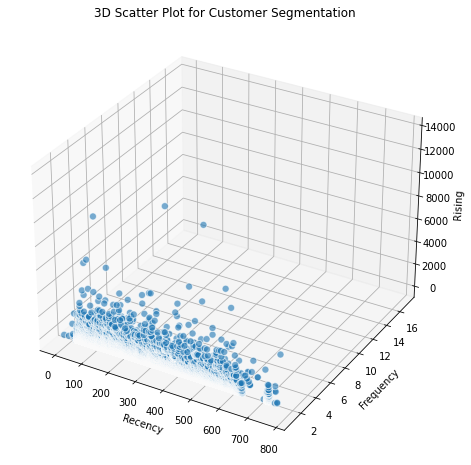

In [36]:
# Création de la figure et d'un axe 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Définition des axes X, Y et Z
x = df_data_clean['Recency']
y = df_data_clean['Frequency']
z = df_data_clean['Rising']

# Création du nuage de points en 3D
scatter = ax.scatter(x, y, z, alpha=0.6, edgecolors='w', s=50)

# Étiquettes des axes
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Rising')

# Titre du graphique
ax.set_title('3D Scatter Plot for Customer Segmentation')

# Affichage du graphique
plt.show()

### Gestion des valeurs aberrantes 

#### Détection des valeurs aberrantes

La méthode Z-score est plus efficace si vos données suivent une distribution normale ou gaussienne.

La méthode IQR est plus robuste contre les outliers et peut être utilisé dans des distributions non normales.

Nous allons donc effectuer un test de normalite pour savoir comment detecter et gerer nos valeurs aberantes. 

##### Test de normalité

In [37]:
# Niveau de signification (alpha)
alpha = 0.05

# Liste pour stocker les résultats
results = []

# Variables quantitatives à tester
quantitative_columns = ['Review_average', 'Rising', 'Frequency', 'Recency']

for column in quantitative_columns:
    # Récupérer les valeurs de la variable
    values = df_data_clean[column].dropna()

    # Effectuer les tests de normalité pour chaque variable
    shapiro_test = stats.shapiro(values)
    ks_test = stats.kstest(values, 'norm', N=len(values))
    ad_test = stats.anderson(values, dist='norm')
    dagostino_test = stats.normaltest(values)

    # Ajouter les résultats à la liste pour chaque test et variable
    results.append({
        'Variable': column,
        'Shapiro-Wilk': shapiro_test[1] > alpha,
        'Kolmogorov-Smirnov': ks_test.pvalue > alpha,
        'Anderson-Darling': any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values),
        'D\'Agostino-Pearson': dagostino_test.pvalue > alpha,
    })

# Création d'un DataFrame avec les résultats
test_results = pd.DataFrame(results)

test_results


/home/nexus/venv/lib/python3.6/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Variable,Shapiro-Wilk,Kolmogorov-Smirnov,Anderson-Darling,D'Agostino-Pearson
0,Review_average,False,False,False,False
1,Rising,False,False,False,False
2,Frequency,False,False,False,False
3,Recency,False,False,False,False


#### Détection des valeurs aberrantes avec IQR

In [38]:
# DataFrame vide pour enregistrer les valeurs aberrantes.
outliers_df = pd.DataFrame()

# Calculer les quartiles et l'IQR pour chaque colonne quantitative, et détecter les valeurs aberrantes
for column in ['Review_average', 'Rising', 'Frequency', 'Recency']:
    Q1 = df_data_clean[column].quantile(0.25)
    Q3 = df_data_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filtrer les valeurs aberrantes en utilisant l'IQR
    filter_outliers = (df_data_clean[column] < (Q1 - 1.5 * IQR)) | (df_data_clean[column] > (Q3 + 1.5 * IQR))
    outliers = df_data_clean[filter_outliers]
    outliers_df = outliers_df.append(outliers, ignore_index=True)

# Afficher les valeurs aberrantes pour chaque variable
print("Valeurs aberrantes détectées par variable :")
outliers_df

Valeurs aberrantes détectées par variable :


,customer_unique_id,Importance,Recency,Frequency,Rising,Review_average
0,00053a61a98854899e70ed204dd4bafe,False,231,1,419.18,0.000000
1,0005ef4cd20d2893f0d9fbd94d3c0d97,False,219,1,129.76,0.000000
2,000de6019bb59f34c099a907c151d855,False,425,1,257.44,0.250000
3,0010a452c6d13139e50b57f19f52e04e,False,463,1,325.93,0.000000
4,0012929d977a8d7280bb277c1e5f589d,False,365,1,155.65,0.000000
...,...,...,...,...,...,...
24516,ff922bdd6bafcdf99cb90d7f39cea5b3,True,398,3,139.60,0.833333
24517,ffe254cc039740e17dd15a5305035928,True,563,2,80.12,0.500000
24518,009b0127b727ab0ba422f6d9604487c7,False,764,1,40.95,0.000000
24519,4854e9b3feff728c13ee5fc7d1547e92,False,772,1,75.06,0.000000


In [39]:
# Calcul des centiles pour le montant dépensé (Rising)
centiles_rising = df_data_clean['Rising'].quantile([.25, .5, .75, .9, .95, .99]).to_dict()

# Calcul des centiles pour la fréquence des achats (Frequency)
centiles_frequency = df_data_clean['Frequency'].quantile([.25, .5, .75, .9, .95, .99]).to_dict()

# Affichage des centiles
print("Centiles pour le montant dépensé (Rising):", centiles_rising)
print("Centiles pour la fréquence des achats (Frequency):", centiles_frequency)

Centiles pour le montant dépensé (Rising): {0.25: 63.12, 0.5: 108.0, 0.75: 183.53, 0.9: 319.57, 0.95: 476.15200000000004, 0.99: 1122.4661999999994}
Centiles pour la fréquence des achats (Frequency): {0.25: 1.0, 0.5: 1.0, 0.75: 1.0, 0.9: 1.0, 0.95: 1.0, 0.99: 2.0}


Après une analyse approfondie, nous avons constaté que les variations observées dans nos données reflètent des comportements d'achat normaux dans un contexte e-commerce.

Étant donné cette variabilité naturelle et attendue, nous avons décidé de ne pas considérer ces variations comme des valeurs aberrantes nécessitant une correction ou une exclusion de notre ensemble de données.

Cette décision est prise dans le but de préserver l'intégrité de notre analyse de segmentation et d'assurer que nos insights métier soient représentatifs de l'ensemble de notre clientèle.

Cette décision est motivée suite à notre examen des quantiles qui a démonté que la majorité des clients effectuent un achat unique, ce qui est conforme aux comportements de consommation en ligne habituels.

Les données révèlent également un segment plus restreint de clients avec des dépenses supérieures, probablement dû à des achats plus conséquents ou des préférences pour des produits de valeur.

### Gestion des doublons

In [40]:
duplicates = df_data_clean[df_data_clean.duplicated()]

if len(duplicates) > 0:
    print("Notre jeu de données contient", len(duplicates), "doublon(s).")
else:
    print("Notre jeu de données ne contient pas de doublons.")

Notre jeu de données ne contient pas de doublons.


## Analyse Univariée

#### La variance empirique

La variance donne une idée de la dispersion des données autour de leur moyenne.

In [41]:
# Calcul des variances
var_recency = df_data_clean['Recency'].var()
var_frequency = df_data_clean['Frequency'].var()
var_rising = df_data_clean['Rising'].var()

# Création d'un dictionnaire
var_dict = {
    'Feature': ['Recency', 'Frequency', 'Rising'],
    'Variance': [var_recency, var_frequency, var_rising]
}

# Conversion du dictionnaire en DataFrame
var_df = pd.DataFrame(var_dict)

# Affichage du DataFrame
var_df

,Feature,Variance
0,Recency,23533.967124
1,Frequency,0.045961
2,Rising,53559.341264


**Recency:**

La caractéristique `Recency` a une variance relativement élevée. 

Cela indique que les valeurs de `Recency` sont assez dispersées par rapport à la moyenne.

Certains clients pourraient avoir passé une commande très récemment, tandis que d'autres n'ont pas commandé depuis longtemps.

**Frequency:** 

La variance de `Frequency` est relativement faible. 

Cela suggère que les valeurs de fréquence des commandes des clients sont assez proches les unes des autres.

La plupart des clients pourraient avoir un nombre similaire de commandes, avec moins de clients ayant des fréquences d'achat extrêmement élevées ou très faibles. 

Cela peut indiquer un comportement d'achat cohérent parmi la majorité des clients.

**Rising:**

`Rising` a la variance la plus élevée parmi les trois caractéristiques.

Cela indique une grande disparité dans les montants totaux dépensés par les clients.

Cette forte variance peut refléter le fait que certains clients dépensent beaucoup plus que d'autres.

Il peut y avoir des clients qui font de gros achats ou commandent fréquemment, tandis que d'autres font des achats plus modestes

#### L'écart-type empirique

In [42]:
# Calculer L'écart-type empirique
std_recency = df_data_clean['Recency'].std()
std_frequency = df_data_clean['Frequency'].std()
std_rising = df_data_clean['Rising'].std()



# Création d'un dictionnaire
std_dict = {
    'Feature': ['Recency', 'Frequency', 'Rising'],
    'Ecart type': [std_recency, std_frequency, std_rising]
}

# Conversion du dictionnaire en DataFrame
std_df = pd.DataFrame(var_dict)

# Affichage du DataFrame
std_df

,Feature,Variance
0,Recency,23533.967124
1,Frequency,0.045961
2,Rising,53559.341264


#### Coefficient de variation de L'écart-type empirique

In [43]:
# Calculer le Coefficient de variation de L'écart-type empirique
var_std_recency = df_data_clean['Recency'].std()/df_data_clean['Recency'].mean()
var_std_freqency = df_data_clean['Frequency'].std()/df_data_clean['Frequency'].mean()
var_std_rising = df_data_clean['Rising'].std()/df_data_clean['Rising'].mean()

# Création d'un dictionnaire
var_std_dict = {
    'Feature' : ['Recency', 'Frequency', 'Rising'],
    'Ecart type empirique': [var_std_recency ,var_std_freqency, std_rising ]
}

# Conversion du dictionnaire en DataFrame
var_std_df = pd.DataFrame(var_std_dict)

# Affichage du DataFrame
var_std_df

,Feature,Ecart type empirique
0,Recency,0.533165
1,Frequency,0.207173
2,Rising,231.428912


#### Mesures de tendance centrale

Les mesures de tendance centrale permettent d'avoir une idée de la valeur autour de laquelle se concentrent l'ensemble de nos valeurs.

In [44]:
# Calculer la moyenne
mean_Recency = df_data_clean['Recency'].mean()
mean_Frequency = df_data_clean['Frequency'].mean()
mean_Rising = df_data_clean['Rising'].mean()

# Calculer la médiane
med_Recency = df_data_clean['Recency'].median()
med_Frequency = df_data_clean['Frequency'].median()
med_Rising = df_data_clean['Rising'].median()

# Calculer le mode
mode_Recency = df_data_clean['Recency'].mode().values[0]
mode_Frequency = df_data_clean['Frequency'].mode().values[0]
mode_Rising = df_data_clean['Rising'].mode().values[0]

# Création d'un dictionnaire
tc_dict = {
        'Recency': {'Moyenne': mean_Recency, 'Mediane': med_Recency, 'Mode': mode_Recency},
        'Frequency': {'Moyenne': mean_Frequency, 'Mediane': med_Frequency, 'Mode': mode_Frequency},
        'Rising': {'Moyenne': mean_Rising, 'Mediane': med_Rising, 'Mode': mode_Rising}
}

# Conversion du dictionnaire en DataFrame
tc_df = pd.DataFrame(tc_dict)

# Affichage du DataFrame
tc_df

,Recency,Frequency,Rising
Moyenne,287.730756,1.034809,166.594226
Mediane,268.000000,1.000000,108.000000
Mode,327.000000,1.000000,77.570000


**Recency (Récence)**

- Moyenne : En moyenne, les clients ont passé leur dernière commande il y a environ 287,74 jours. Cela suggère une certaine inactivité ou une faible fréquence d'achat récurrente dans l'ensemble de la base de données.

- Médiane : La médiane de 268 jours indique que la moitié des clients ont passé une commande plus récemment que cela et l'autre moitié plus tôt. Cela montre que la répartition des derniers achats est légèrement inclinée vers des périodes plus longues.

- Mode : Le mode de 327 jours est la valeur de récence la plus fréquente parmi les clients. Cela signifie que le nombre le plus élevé de clients a passé leur dernière commande il y a 327 jours.

**Frequency (Fréquence)**

- Moyenne : En moyenne, les clients ont passé environ 1,03 commande. Cela indique que la plupart des clients n'ont passé qu'une seule commande, avec quelques exceptions.

- Médiane : La médiane est de 1, ce qui confirme que plus de la moitié des clients ont passé une seule commande.

- Mode : Le mode est également 1, renforçant l'observation que la majorité des clients ont passé une seule commande.

**Rising (Montant Total Dépensé)**

- Moyenne : En moyenne, les clients ont dépensé environ 166,59 unités monétaires. Cette moyenne peut être influencée par quelques gros acheteurs.

- Médiane : La médiane est de 108, ce qui est nettement inférieur à la moyenne, suggérant que la majorité des clients dépensent moins que la moyenne, avec quelques clients dépensant beaucoup plus.

- Mode : Le mode de 77,57 est la dépense la plus fréquente. Cela indique que la plupart des clients dépensent autour de cette valeur sur leurs achats.


**Implications Générales**

- Engagement Client : La récence relativement élevée suggère un manque d'engagement régulier des clients avec l'entreprise.

- Fréquence d'Achat : La fréquence montre que la plupart des clients ne sont pas des acheteurs répétés.

- Dépenses des Clients : La distribution des dépenses indique une grande variété dans le comportement des clients en termes de dépenses totales, avec quelques clients dépensant beaucoup plus que la moyenne.

#### Mesures de forme

Les mesures de forme sont des mesures permettant de déterminer si la majeure partie des valeurs est plus petite ou plus grande que la moyenne.

In [45]:
# Calculer l'asymétrie
asymetrie_recency = skew(df_data_clean['Recency'])
asymetrie_frequency = skew(df_data_clean['Frequency'])
asymetrie_rising = skew(df_data_clean['Rising'])


# Calculer le coefficient d'aplatissement
aplatissement_recency = kurtosis(df_data_clean['Recency'])
aplatissement_frequency = kurtosis(df_data_clean['Frequency'])
aplatissement_rising = kurtosis(df_data_clean['Rising'])



# Création d'un dictionnaire
tc_dict = {
        'Recency': {'asymétrie': asymetrie_recency, 'aplatissement': aplatissement_recency},
        'Frequency': {'asymétrie': asymetrie_frequency, 'aplatissement': aplatissement_frequency},
        'Rising': {'asymétrie': asymetrie_rising, 'aplatissement': aplatissement_rising}
}

# Conversion du dictionnaire en DataFrame
mf_df = pd.DataFrame(tc_dict)

# Affichage du DataFrame
mf_df

,Recency,Frequency,Rising
asymétrie,0.445303,11.862346,9.467044
aplatissement,-0.655080,421.386341,243.303759


- Recency : Les données sont relativement modérément dispersées autour de la moyenne.

- Frequency : Les resultats suggère une grande variabilité avec des valeurs extrêmes loin de la moyenne.

- Rising : Comme pour l'asymétrie, l'aplatissement n'est pas disponible.Ceci est certainement du au valeurs manquantes presentes pour cette feature.

#### Mesures de concentration

Les mesures de concentration permettent d'évaluer si une variable est également répartie (ou non) entre différents individus.

Elles évaluent le degré de concentration des valeurs autour de la moyenne. Une mesure courante est le coefficient de variation (CV), qui est le rapport de l'écart-type à la moyenne.

La courbe de Lorenz permet de représenter la répartition d'une variable au sein d'une population, notamment si elle est égalitaire ou non.

Le coefficient de GINI permet d'évaluer de façon chiffrée cette répartition. Il correspond à deux fois l'aire sous la courbe de Lorenz.

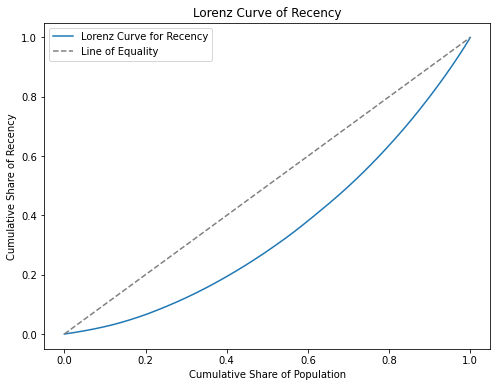

Gini Coefficient for Recency: -0.3034


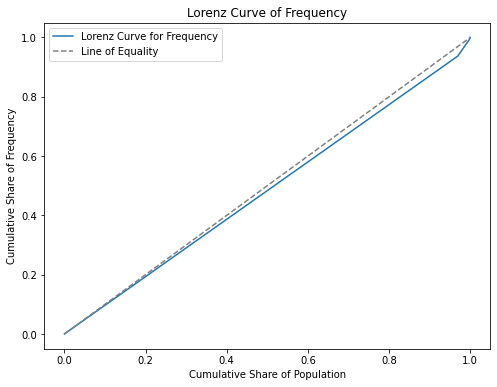

Gini Coefficient for Frequency: -0.0327


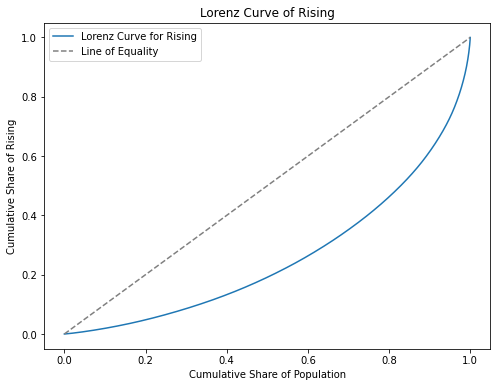

Gini Coefficient for Rising: -0.4811


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

def plot_lorenz_gini(data, feature_name):
    # Tri des valeurs de la variable
    sorted_values = np.sort(data[feature_name].dropna())  # Suppression des valeurs NaN

    # Calcul des proportions cumulées
    cumulative_population = np.linspace(0, 1, len(sorted_values))
    cumulative_variable = np.cumsum(sorted_values) / sorted_values.sum()

    # Tracé de la courbe de Lorenz
    plt.figure(figsize=(8, 6))
    plt.plot(cumulative_population, cumulative_variable, label='Lorenz Curve for ' + feature_name)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Line of Equality')
    plt.xlabel('Cumulative Share of Population')
    plt.ylabel('Cumulative Share of ' + feature_name)
    plt.title('Lorenz Curve of ' + feature_name)
    plt.legend()
    plt.show()

    # Calcul de l'aire sous la courbe de Lorenz
    auc = metrics.auc(cumulative_population, cumulative_variable)

    # Calcul du coefficient de Gini
    gini_coefficient = 2 * (auc - 0.5)

    print("Gini Coefficient for " + feature_name + ": {:.4f}".format(gini_coefficient))

# Appliquer la fonction aux caractéristiques
plot_lorenz_gini(df_data_clean, 'Recency')
plot_lorenz_gini(df_data_clean, 'Frequency')
plot_lorenz_gini(df_data_clean, 'Rising')

In [47]:
#Extraction du dataset :
df_data_clean.to_csv('Data/Datasets/df_data_clean.csv', index=False)

## Analyse Bivariée

### Recherchez des corrélations

#### Diagramme de dispersion 

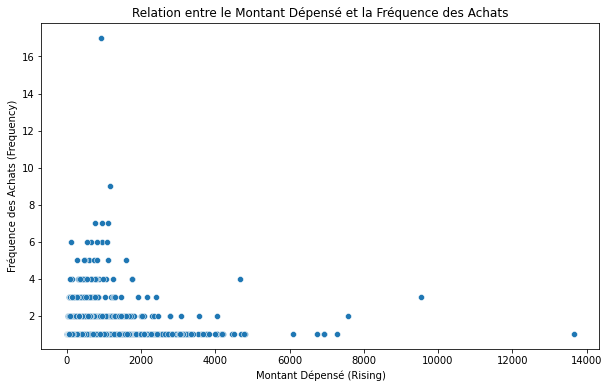

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_data_clean, x='Rising', y='Frequency')

plt.title('Relation entre le Montant Dépensé et la Fréquence des Achats')
plt.xlabel('Montant Dépensé (Rising)')
plt.ylabel('Fréquence des Achats (Frequency)')

# Pour voir le graphique
plt.show()

In [49]:
# Calcul du coefficient de corrélation de Pearson
pearson_corr, _ = st.pearsonr(df_data_clean["Rising"], df_data_clean["Frequency"])
print(f"Coefficient de corrélation de Pearson entre Rising et Frequency : {pearson_corr}")

# Calcul de la covariance
covariance = np.cov(df_data_clean["Rising"], df_data_clean["Frequency"], ddof=0)[0, 1]
print(f"Covariance entre Rising et Frequency : {covariance}")

Coefficient de corrélation de Pearson entre Rising et Frequency : 0.1260313371157167
Covariance entre Rising et Frequency : 6.2529608719102105


#### Boîte à moustaches

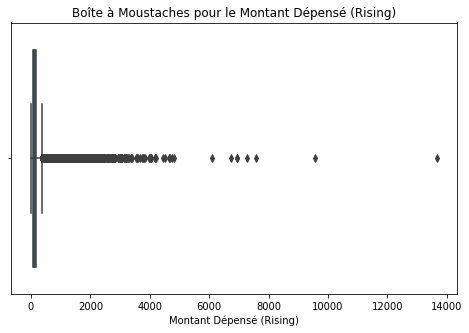

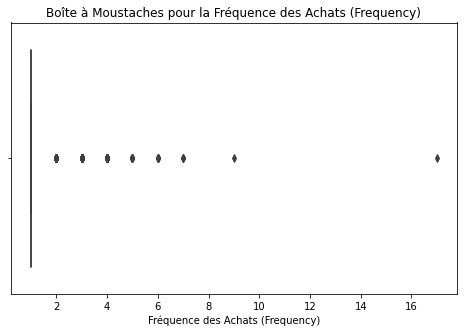

In [50]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_data_clean, x='Rising')
plt.title('Boîte à Moustaches pour le Montant Dépensé (Rising)')
plt.xlabel('Montant Dépensé (Rising)')

# Afficher le premier boxplot
plt.show()

# Pour créer un boxplot pour la fréquence (Frequency)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_data_clean, x='Frequency')
plt.title('Boîte à Moustaches pour la Fréquence des Achats (Frequency)')
plt.xlabel('Fréquence des Achats (Frequency)')

# Afficher le deuxième boxplot
plt.show()

Les résultats de nos analyses indiquent une corrélation modeste entre le montant dépensé et la fréquence des achats, avec un coefficient de Pearson de 0.126.

Cela suggère une légère tendance pour les clients qui dépensent plus à acheter légèrement plus fréquemment. Cependant, la covariance de 6.25 indique que cette relation n'est pas fortement linéaire.

La distribution des dépenses et de la fréquence des achats, illustrée par les boîtes à moustaches, montre un large éventail de comportements d'achat, avec quelques valeurs extrêmes qui ne sont pas considérées comme des aberrations dans le contexte de l'e-commerce.

Ainsi, notre analyse reflète une variété de comportements d'achat qui sont représentatifs de la clientèle globale du site.